In [1]:
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import astropy.units as u
import numpy as np

In [2]:
mh = '+0.5'
CtoO = '1.0'

In [3]:
filename_db="/Users/sagnickmukherjee/Documents/software/picaso-dev/reference/opacities/ck_cx_cont_opacities.db"
ck_db='/Users/sagnickmukherjee/Documents/software/picaso-dev/reference/opacities/ck_db/m'+mh+'_co'+CtoO+'.data.196'
opacity_ck = jdi.opannection(ck=True, ck_db=ck_db,filename_db=filename_db)

In [4]:
semi_major = "NA" # AU
T_eff = 1100
T_star = "NA"
grav = 316

cl_run = jdi.inputs(calculation="brown", climate = True)
#cl_run.star(opacity_ck, 5000,0,4.0) #opacity db, pysynphot database, temp, metallicity, logg
cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)'))
cl_run.T_eff(Teff=T_eff)
cl_run.setup_climate_data()



In [5]:
nlevel = 91
pressure=np.logspace(np.log10(1.778000000000000392e-04),np.log10(65.2893599 ),nlevel)
temp_guess = np.zeros_like(pressure) 

for i in range(len(temp_guess)):
    temp_guess[i] = 110+i*10

nofczns = 1
nstr = np.array([0,80,89,0,0,0])
rfacv = 0.0
rfaci =1.0
cloudy = False


cl_run.inputs_climate(temp_guess= temp_guess, pressure= pressure, nstr = nstr, nofczns = nofczns , rfacv = rfacv, rfaci = rfaci, cloudy = cloudy, mh = mh, CtoO = CtoO)

In [6]:
pressure , temp, dtdp, nstr_new, flux_plus_final = cl_run.run_climate_model(opacity_ck)

Iteration number  0 , min , max temp  130.8926723258196 1468.8163015226805 , flux balance  -0.9141874707092762
Iteration number  1 , min , max temp  227.09681704653318 2493.914281844315 , flux balance  -0.6750691317930557
Iteration number  2 , min , max temp  260.51511489204324 2523.574465213247 , flux balance  -0.5988873135317787
Iteration number  3 , min , max temp  316.21516026763493 2622.1264597958734 , flux balance  -0.26773158443615125
Iteration number  4 , min , max temp  343.2826910653075 2722.706401744578 , flux balance  0.042280993270242956
Iteration number  5 , min , max temp  343.3574491735277 2713.0975631561373 , flux balance  0.0010304389745936179
Iteration number  6 , min , max temp  343.34751216606895 2712.8267072811304 , flux balance  9.030279446909482e-06
Converged Solution in iterations  6
Big iteration is  343.34751216606895 0
Iteration number  0 , min , max temp  368.5954498340734 2822.7772696539514 , flux balance  -0.3622285677595139
Iteration number  1 , min , ma

Big iteration is  496.4449396900214 0
Iteration number  0 , min , max temp  497.4213898444235 3079.447478244691 , flux balance  4.6606236111848345e-06
Converged Solution in iterations  0
Profile converged
Iteration number  0 , min , max temp  497.72586277357163 3081.397103743881 , flux balance  -5.248561195445487e-06
Converged Solution in iterations  0
Iteration number  0 , min , max temp  497.845546381719 3081.9931743740754 , flux balance  -2.242772791217405e-06
Converged Solution in iterations  0
Iteration number  0 , min , max temp  497.90189058045485 3082.166397855923 , flux balance  -6.914628053111788e-07
Converged Solution in iterations  0
Iteration number  0 , min , max temp  498.1446272587103 3067.3703639191044 , flux balance  -9.734134699882743e-06
Converged Solution in iterations  0
Big iteration is  498.1446272587103 0
Iteration number  0 , min , max temp  498.47691141431255 3069.877109225458 , flux balance  -1.7903728121326576e-05
Converged Solution in iterations  0
Profile

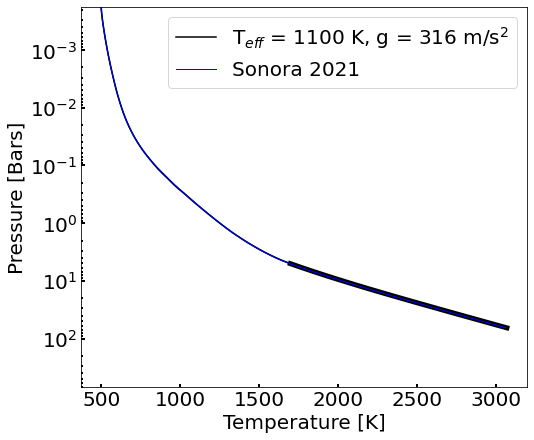

In [7]:
import matplotlib.pyplot as plt
Teff = cl_run.inputs['planet']['T_eff']
grav = int(0.01*cl_run.inputs['planet']['gravity'])

P_son,TEMP_son=np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m"+mh+"/t"+str(Teff)+"g"+str(grav)+"nc_m"+mh+".dat",usecols=[1,2],unpack=True,skiprows= 1)
plt.figure(figsize=(8,7))

plt.ylim(700,0.0001778)
plt.semilogy(temp,pressure)#,label= "T$_{eff}$ = "+str(Teff)+" K, g = "+str(grav)+" m/s$^2$",color= "k")

plt.semilogy(temp[:nstr_new[1]+1],pressure[:nstr_new[1]+1],label= "T$_{eff}$ = "+str(Teff)+" K, g = "+str(grav)+" m/s$^2$",color= "k")
plt.semilogy(temp[nstr_new[1]:nstr_new[2]+2],pressure[nstr_new[1]:nstr_new[2]+2],color= "k",linewidth=5)
#plt.semilogy(temp[nstr_new[3]:nstr_new[4]+1],pressure[nstr_new[3]:nstr_new[4]+1],color= "k")
#plt.semilogy(temp[nstr_new[4]:],pressure[nstr_new[4]:],color= "k",linewidth=5)

plt.semilogy(TEMP_son,P_son,label= "Sonora 2021",color= "b",linewidth=1)
plt.ylabel("Pressure [Bars]",fontsize= 20)
plt.xlabel("Temperature [K]",fontsize = 20)
plt.legend(fontsize =20)
plt.tick_params(axis='both',which='both', width=2,direction='in',labelsize=20)
#plt.savefig("/Users/sagnickmukherjee/Documents/software/picaso-dev/RESULTS_benchmarking/"+str(Teff)+"_"+str(grav)+"m"+mh+".pdf", bbox_inches="tight")
plt.savefig("/Users/sagnickmukherjee/Documents/software/picaso-dev/RESULTS_benchmarking/tp/"+str(Teff)+"_"+str(grav)+"m"+mh+"_sm_"+semi_major+".pdf", bbox_inches="tight")

In [8]:
'''
wvno = opacity_ck.wno
bwni, wvno_dummy= np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/INPUTS/INTERVALS.IR",usecols=[0,1],unpack=True)


dwni=np.zeros(shape=(196))
for i in range(196):
    dwni[i]=bwni[i+1]-bwni[i]
    
wave, son_flux = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/spectra_m"+mh+"/sp_t"+str(Teff)+"g"+str(grav)+"nc_m"+mh,usecols=[0,1],unpack=True,skiprows = 2)
wave,son_flux = jdi.mean_regrid(1e4/wave, son_flux, R=200) #wavenumber, erg/cm2/s/Hz
flux_py = []
for i,flux in zip(range(196),flux_plus_final[0,0,0,:]):
    flux_py.append(flux*(wvno[i]**2)/(dwni[i]))

flux_py_a = np.array(flux_py)

x,y = wvno, flux_py_a #units of erg/cm2/s/cm

xmicron = 1e4/x

flamy = y*1e-8 #per anstrom instead of per cm
sp = jdi.psyn.ArraySpectrum(xmicron, flamy,
                            waveunits='um',
                            fluxunits='FLAM')
sp.convert("um")
sp.convert('Fnu') #erg/cm2/s/Hz

x = sp.wave #micron
y= sp.flux #erg/cm2/s/Hz

plt.figure(figsize = (8,6))
plt.xlim(0.2,5)
plt.semilogy(x,y,label= "EGP py")
plt.ylabel("Flux [erg/cm$^2$/s/cm]",fontsize = 20)
plt.xlabel("Wavelength [microns]",fontsize = 20)
plt.semilogy(1e4/wave, son_flux,label = "SONORA 2021 Eddington Flux",linestyle="--")
plt.legend(fontsize =20)
#plt.savefig("/Users/sagnickmukherjee/Documents/software/picaso-dev/RESULTS_benchmarking/spectra_"+str(Teff)+"_grav_"+str(grav)+"m"+mh+".pdf",bbox_inches= 'tight')
plt.savefig("/Users/sagnickmukherjee/Documents/software/picaso-dev/RESULTS_benchmarking/spectra/spectra_"+str(Teff)+"_grav_"+str(grav)+"_sm_"+semi_major+".pdf",bbox_inches= 'tight')
'''

'\nwvno = opacity_ck.wno\nbwni, wvno_dummy= np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/INPUTS/INTERVALS.IR",usecols=[0,1],unpack=True)\n\n\ndwni=np.zeros(shape=(196))\nfor i in range(196):\n    dwni[i]=bwni[i+1]-bwni[i]\n    \nwave, son_flux = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/spectra_m"+mh+"/sp_t"+str(Teff)+"g"+str(grav)+"nc_m"+mh,usecols=[0,1],unpack=True,skiprows = 2)\nwave,son_flux = jdi.mean_regrid(1e4/wave, son_flux, R=200) #wavenumber, erg/cm2/s/Hz\nflux_py = []\nfor i,flux in zip(range(196),flux_plus_final[0,0,0,:]):\n    flux_py.append(flux*(wvno[i]**2)/(dwni[i]))\n\nflux_py_a = np.array(flux_py)\n\nx,y = wvno, flux_py_a #units of erg/cm2/s/cm\n\nxmicron = 1e4/x\n\nflamy = y*1e-8 #per anstrom instead of per cm\nsp = jdi.psyn.ArraySpectrum(xmicron, flamy,\n                            waveunits=\'um\',\n                            fluxunits=\'FLAM\')\nsp.convert("um")\nsp.convert(\'Fnu\') #erg/cm2/s/Hz\n\nx = sp.wa

In [9]:
filename= "/Users/sagnickmukherjee/Documents/software/picaso-dev/RESULTS_benchmarking/tp_file/tp_"+str(Teff)+"_grav_"+str(grav)+"_mh_"+mh+"_sm_"+semi_major+".dat"
np.savetxt(filename, np.transpose([pressure,temp]), header= str("nstr "+str(nstr_new)+" T_eff "+str(T_eff)+" grav "+ str(grav)+" T_star "+T_star+" semi-major[AU] "+semi_major))                                                                 

In [10]:
for iz in range(10-1,-1,-1):
    print(iz)

9
8
7
6
5
4
3
2
1
0
